In [1]:
import numpy as np
import pandas as pd

In [2]:
import os

In [3]:
import joblib

In [4]:
data_path=os.path.join(".","Data","request_data.txt")

In [5]:
dataset=pd.read_csv(data_path)

In [6]:
dataset

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [7]:
row_zero=dataset.columns

In [8]:
list(row_zero)

['0',
 'tcp',
 'ftp_data',
 'SF',
 '491',
 '0.1',
 '0.2',
 '0.3',
 '0.4',
 '0.5',
 '0.6',
 '0.7',
 '0.8',
 '0.9',
 '0.10',
 '0.11',
 '0.12',
 '0.13',
 '0.14',
 '0.15',
 '0.16',
 '0.18',
 '2',
 '2.1',
 '0.00',
 '0.00.1',
 '0.00.2',
 '0.00.3',
 '1.00',
 '0.00.4',
 '0.00.5',
 '150',
 '25',
 '0.17',
 '0.03',
 '0.17.1',
 '0.00.6',
 '0.00.7',
 '0.00.8',
 '0.05',
 '0.00.9',
 'normal',
 '20']

In [9]:
columns=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level']

In [10]:
len(columns)

43

In [11]:
dataset.columns=columns

In [12]:
dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [14]:
dataset["attack"].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [15]:
dataset["request_type"]=dataset["attack"].map(lambda x: "normal" if x=="normal" else "harmful")

In [16]:
dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,request_type
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,harmful
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,harmful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,harmful
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,normal
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,normal
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,harmful


In [17]:
dataset.drop(["attack"],axis=1,inplace=True)

In [18]:
dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,request_type
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,harmful
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,21,harmful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,20,harmful
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,21,normal
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,18,normal
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,20,harmful


<Axes: >

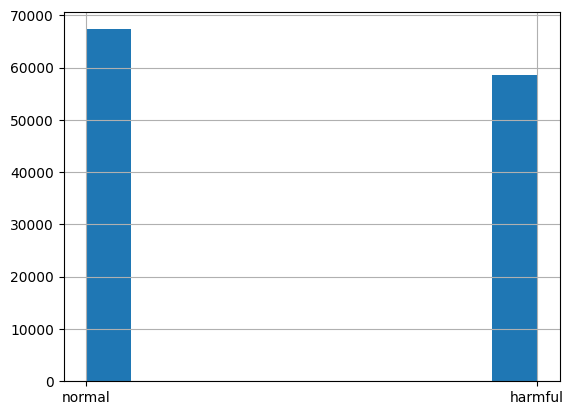

In [19]:
dataset["request_type"].hist()

In [20]:
final_dataset=dataset[["duration","protocol_type","service","src_bytes","dst_bytes","flag","wrong_fragment","urgent","count","srv_count","request_type"]]

In [21]:
final_dataset

,duration,protocol_type,service,src_bytes,dst_bytes,flag,wrong_fragment,urgent,count,srv_count,request_type
0,0,udp,other,146,0,SF,0,0,13,1,normal
1,0,tcp,private,0,0,S0,0,0,123,6,harmful
2,0,tcp,http,232,8153,SF,0,0,5,5,normal
3,0,tcp,http,199,420,SF,0,0,30,32,normal
4,0,tcp,private,0,0,REJ,0,0,121,19,harmful
...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,0,0,S0,0,0,184,25,harmful
125968,8,udp,private,105,145,SF,0,0,2,2,normal
125969,0,tcp,smtp,2231,384,SF,0,0,1,1,normal
125970,0,tcp,klogin,0,0,S0,0,0,144,8,harmful


In [22]:
final_dataset["protocol_type"].unique()

array(['udp', 'tcp', 'icmp'], dtype=object)

In [23]:
service_dict={}
for srv in final_dataset["service"]:
    if srv not in service_dict.keys():
        service_dict[srv]=1
    else:
        service_dict[srv]+=1

In [24]:
service_dict

{'other': 4359,
 'private': 21853,
 'http': 40338,
 'remote_job': 78,
 'ftp_data': 6859,
 'name': 451,
 'netbios_ns': 347,
 'eco_i': 4586,
 'mtp': 439,
 'telnet': 2353,
 'finger': 1767,
 'domain_u': 9043,
 'supdup': 544,
 'uucp_path': 689,
 'Z39_50': 862,
 'smtp': 7313,
 'csnet_ns': 545,
 'uucp': 780,
 'netbios_dgm': 405,
 'urp_i': 602,
 'auth': 955,
 'domain': 569,
 'ftp': 1754,
 'bgp': 710,
 'ldap': 410,
 'ecr_i': 3077,
 'gopher': 518,
 'vmnet': 617,
 'systat': 477,
 'http_443': 530,
 'efs': 485,
 'whois': 693,
 'imap4': 647,
 'iso_tsap': 687,
 'echo': 434,
 'klogin': 433,
 'link': 475,
 'sunrpc': 381,
 'login': 429,
 'kshell': 299,
 'sql_net': 245,
 'time': 654,
 'hostnames': 460,
 'exec': 474,
 'ntp_u': 168,
 'discard': 538,
 'nntp': 296,
 'courier': 734,
 'ctf': 563,
 'ssh': 311,
 'daytime': 521,
 'shell': 65,
 'netstat': 360,
 'pop_3': 264,
 'nnsp': 630,
 'IRC': 187,
 'pop_2': 78,
 'printer': 69,
 'tim_i': 8,
 'pm_dump': 5,
 'red_i': 8,
 'netbios_ssn': 362,
 'rje': 86,
 'X11': 73

In [25]:
imp_service=[]
for srv,val in service_dict.items():
    if val>=1000:
        imp_service.append(srv)

In [26]:
imp_service

['other',
 'private',
 'http',
 'ftp_data',
 'eco_i',
 'telnet',
 'finger',
 'domain_u',
 'smtp',
 'ftp',
 'ecr_i']

In [27]:
final_dataset["flag"].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [28]:
final_dataset

,duration,protocol_type,service,src_bytes,dst_bytes,flag,wrong_fragment,urgent,count,srv_count,request_type
0,0,udp,other,146,0,SF,0,0,13,1,normal
1,0,tcp,private,0,0,S0,0,0,123,6,harmful
2,0,tcp,http,232,8153,SF,0,0,5,5,normal
3,0,tcp,http,199,420,SF,0,0,30,32,normal
4,0,tcp,private,0,0,REJ,0,0,121,19,harmful
...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,0,0,S0,0,0,184,25,harmful
125968,8,udp,private,105,145,SF,0,0,2,2,normal
125969,0,tcp,smtp,2231,384,SF,0,0,1,1,normal
125970,0,tcp,klogin,0,0,S0,0,0,144,8,harmful


In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
label_encoder=LabelEncoder

In [31]:
final_data_cat=final_dataset.select_dtypes(include=["object"])

In [32]:
final_data_cat

,protocol_type,service,flag,request_type
0,udp,other,SF,normal
1,tcp,private,S0,harmful
2,tcp,http,SF,normal
3,tcp,http,SF,normal
4,tcp,private,REJ,harmful
...,...,...,...,...
125967,tcp,private,S0,harmful
125968,udp,private,SF,normal
125969,tcp,smtp,SF,normal
125970,tcp,klogin,S0,harmful


In [33]:
final_data_cat.columns.values

array(['protocol_type', 'service', 'flag', 'request_type'], dtype=object)

In [34]:
class_label={}

In [35]:
for col in final_data_cat.columns.values:
    print(col)
    encoder=LabelEncoder()
    final_data_cat[col]=encoder.fit_transform(final_data_cat[col])
    cat_dict=dict(zip(encoder.classes_,range(len(encoder.classes_))))
    class_label.update(cat_dict)

protocol_type
service
flag
request_type


In [36]:
class_label

{'icmp': 0,
 'tcp': 1,
 'udp': 2,
 'IRC': 0,
 'X11': 1,
 'Z39_50': 2,
 'aol': 3,
 'auth': 4,
 'bgp': 5,
 'courier': 6,
 'csnet_ns': 7,
 'ctf': 8,
 'daytime': 9,
 'discard': 10,
 'domain': 11,
 'domain_u': 12,
 'echo': 13,
 'eco_i': 14,
 'ecr_i': 15,
 'efs': 16,
 'exec': 17,
 'finger': 18,
 'ftp': 19,
 'ftp_data': 20,
 'gopher': 21,
 'harvest': 22,
 'hostnames': 23,
 'http': 24,
 'http_2784': 25,
 'http_443': 26,
 'http_8001': 27,
 'imap4': 28,
 'iso_tsap': 29,
 'klogin': 30,
 'kshell': 31,
 'ldap': 32,
 'link': 33,
 'login': 34,
 'mtp': 35,
 'name': 36,
 'netbios_dgm': 37,
 'netbios_ns': 38,
 'netbios_ssn': 39,
 'netstat': 40,
 'nnsp': 41,
 'nntp': 42,
 'ntp_u': 43,
 'other': 44,
 'pm_dump': 45,
 'pop_2': 46,
 'pop_3': 47,
 'printer': 48,
 'private': 49,
 'red_i': 50,
 'remote_job': 51,
 'rje': 52,
 'shell': 53,
 'smtp': 54,
 'sql_net': 55,
 'ssh': 56,
 'sunrpc': 57,
 'supdup': 58,
 'systat': 59,
 'telnet': 60,
 'tftp_u': 61,
 'tim_i': 62,
 'time': 63,
 'urh_i': 64,
 'urp_i': 65,
 'uuc

In [37]:
final_data_cat

,protocol_type,service,flag,request_type
0,2,44,9,1
1,1,49,5,0
2,1,24,9,1
3,1,24,9,1
4,1,49,1,0
...,...,...,...,...
125967,1,49,5,0
125968,2,49,9,1
125969,1,54,9,1
125970,1,30,5,0


In [38]:
class_label_path=os.path.join(".","Data","class_label.json")

In [39]:
import json

In [40]:
with open(class_label_path,"w") as file:
    json.dump(class_label,file)

In [41]:
final_data_cat

,protocol_type,service,flag,request_type
0,2,44,9,1
1,1,49,5,0
2,1,24,9,1
3,1,24,9,1
4,1,49,1,0
...,...,...,...,...
125967,1,49,5,0
125968,2,49,9,1
125969,1,54,9,1
125970,1,30,5,0


In [42]:
final_data_num=final_dataset.select_dtypes(exclude=["object"])

In [43]:
final_data_num

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,count,srv_count
0,0,146,0,0,0,13,1
1,0,0,0,0,0,123,6
2,0,232,8153,0,0,5,5
3,0,199,420,0,0,30,32
4,0,0,0,0,0,121,19
...,...,...,...,...,...,...,...
125967,0,0,0,0,0,184,25
125968,8,105,145,0,0,2,2
125969,0,2231,384,0,0,1,1
125970,0,0,0,0,0,144,8


In [44]:
dataset_final=pd.concat([final_data_num,final_data_cat],axis=1)

In [45]:
dataset_final

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,count,srv_count,protocol_type,service,flag,request_type
0,0,146,0,0,0,13,1,2,44,9,1
1,0,0,0,0,0,123,6,1,49,5,0
2,0,232,8153,0,0,5,5,1,24,9,1
3,0,199,420,0,0,30,32,1,24,9,1
4,0,0,0,0,0,121,19,1,49,1,0
...,...,...,...,...,...,...,...,...,...,...,...
125967,0,0,0,0,0,184,25,1,49,5,0
125968,8,105,145,0,0,2,2,2,49,9,1
125969,0,2231,384,0,0,1,1,1,54,9,1
125970,0,0,0,0,0,144,8,1,30,5,0


In [46]:
data_X=dataset_final.drop(['request_type'],axis=1,inplace=False)

In [47]:
data_X=np.array(data_X)

In [48]:
data_X

array([[   0,  146,    0, ...,    2,   44,    9],
       [   0,    0,    0, ...,    1,   49,    5],
       [   0,  232, 8153, ...,    1,   24,    9],
       ...,
       [   0, 2231,  384, ...,    1,   54,    9],
       [   0,    0,    0, ...,    1,   30,    5],
       [   0,  151,    0, ...,    1,   20,    9]])

In [49]:
data_Y=np.array(dataset_final["request_type"])

In [50]:
data_Y

array([1, 0, 1, ..., 1, 0, 1])

### EVALUATING MODEL

In [51]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [52]:
def evaluate_model(ytrue,ypred):
    print(f"Accuracy: {accuracy_score(ytrue,ypred)}")
    print(f"Precision: {precision_score(ytrue,ypred)}")
    print(f"Recall: {recall_score(ytrue,ypred)}")
    print(f"F1 Score: {f1_score(ytrue,ypred)}")

### Processing Test Data

In [53]:
test_data_path=os.path.join(".","Data","request_data_test.txt")

In [54]:
test_data=pd.read_csv(test_data_path)

In [55]:
test_data

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [56]:
test_data.columns=columns

In [57]:
test_data=test_data[["duration","protocol_type","service","src_bytes","dst_bytes","flag","wrong_fragment","urgent","count","srv_count"]]

In [58]:
test_data

,duration,protocol_type,service,src_bytes,dst_bytes,flag,wrong_fragment,urgent,count,srv_count
0,0,tcp,private,0,0,REJ,0,0,136,1
1,2,tcp,ftp_data,12983,0,SF,0,0,1,1
2,0,icmp,eco_i,20,0,SF,0,0,1,65
3,1,tcp,telnet,0,15,RSTO,0,0,1,8
4,0,tcp,http,267,14515,SF,0,0,4,4
...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,794,333,SF,0,0,1,1
22539,0,tcp,http,317,938,SF,0,0,2,11
22540,0,tcp,http,54540,8314,SF,0,0,5,10
22541,0,udp,domain_u,42,42,SF,0,0,4,6


In [59]:
test_data_cat=test_data.select_dtypes(include=["object"])

In [60]:
for col in test_data_cat.columns.values:
    print(col)
    encoder=LabelEncoder()
    test_data_cat[col]=encoder.fit_transform(test_data_cat[col])

protocol_type
service
flag


In [61]:
test_data_cat

,protocol_type,service,flag
0,1,45,1
1,1,19,9
2,0,13,9
3,1,55,2
4,1,22,9
...,...,...,...
22538,1,49,9
22539,1,22,9
22540,1,22,9
22541,2,11,9


In [62]:
test_data_num=test_data.select_dtypes(exclude=["object"])

In [63]:
final_test_data=pd.concat([test_data_num,test_data_cat],axis=1)

In [64]:
final_test_data

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,count,srv_count,protocol_type,service,flag
0,0,0,0,0,0,136,1,1,45,1
1,2,12983,0,0,0,1,1,1,19,9
2,0,20,0,0,0,1,65,0,13,9
3,1,0,15,0,0,1,8,1,55,2
4,0,267,14515,0,0,4,4,1,22,9
...,...,...,...,...,...,...,...,...,...,...
22538,0,794,333,0,0,1,1,1,49,9
22539,0,317,938,0,0,2,11,1,22,9
22540,0,54540,8314,0,0,5,10,1,22,9
22541,0,42,42,0,0,4,6,2,11,9


In [65]:
final_test_data.to_csv("./Data/final_test_data.csv",index=False)

## Models

In [66]:
model_dir=os.path.join(".","Models")

## Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
model=RandomForestClassifier(
    n_estimators=75,
    max_depth=7,
    bootstrap=True
)

In [69]:
model.fit(data_X,data_Y)

RandomForestClassifier(max_depth=7, n_estimators=75)

In [70]:
ypred=model.predict(data_X)

In [71]:
evaluate_model(data_Y,ypred)

Accuracy: 0.9891007525481853
Precision: 0.9838352426913881
Recall: 0.9959757654955302
F1 Score: 0.9898682802641774


In [72]:
model_path=os.path.join(model_dir,"random_forest.pkl")

In [73]:
joblib.dump(model,model_path)

['./Models/random_forest.pkl']

## Gradient Boosting

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
gradient_boosting_model=GradientBoostingClassifier(
    n_estimators=75,
    learning_rate=0.2,
    max_depth=7
)

In [76]:
gradient_boosting_model.fit(data_X,data_Y)

GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=75)

In [77]:
ypred=gradient_boosting_model.predict(data_X)

In [78]:
evaluate_model(data_Y,ypred)

Accuracy: 0.9990870987203505
Precision: 0.999064629637878
Recall: 0.999227822161504
F1 Score: 0.9991462192360518


In [79]:
model_path=os.path.join(model_dir,"gradient_boosting.pkl")

In [80]:
joblib.dump(model,model_path)

['./Models/gradient_boosting.pkl']

### Stacking

In [81]:
from sklearn.ensemble import StackingClassifier

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
from sklearn.svm import SVC

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
logistic_model=LogisticRegression(
    max_iter=75
)

In [86]:
svc_model=SVC()

In [87]:
decision_tree_model=DecisionTreeClassifier(
    max_depth=7,
    splitter="best",
    max_features="sqrt"
)

In [88]:
stacking_model=StackingClassifier(
    estimators=[("logistic",logistic_model),("svc",svc_model)],
    final_estimator=decision_tree_model,
    passthrough=False
)

In [ ]:
stacking_model.fit(data_X,data_Y)

/home/amartya/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/amartya/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

In [ ]:
ypred=stacking_model.predict(data_X)

In [ ]:
evaluate_model(data_Y,ypred)